# **SyriaTel Customer Churn Prediction**

## **1. Introduction**

Customer churn is a significant challenge for many businesses, especially in highly competitive industries like telecommunications. Churn refers to the phenomenon where customers stop doing business with a company. Predicting churn is crucial as it allows businesses to take proactive steps to retain customers, thus reducing loss and increasing profitability.

In this project, we aim to develop a machine learning model to predict whether a customer will stop using SyriaTel's services in the near future. By identifying patterns in customer behavior, the model will help SyriaTel's marketing and customer service teams focus their retention efforts on customers most likely to churn.

---

## **2. CRISP-DM Process Overview**

This project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** methodology, a widely used process model in data science. CRISP-DM is iterative and flexible, making it ideal for addressing complex data science problems. The process involves six main phases:

1. **Business Understanding**
2. **Data Understanding**
3. **Data Preparation**
4. **Modeling**
5. **Evaluation**
6. **Deployment**

Each of these phases will be detailed throughout this notebook.

---

## **3. Business Understanding**

### **3.1 Objective**
The primary goal of this project is to predict customer churn for SyriaTel, a telecommunications company. By accurately predicting which customers are likely to churn, SyriaTel can implement targeted retention strategies to reduce churn rates and improve customer loyalty.

### **3.2 Stakeholders**
- **Marketing Team:** To develop personalized offers and incentives to retain at-risk customers.
- **Customer Service Team:** To proactively reach out to at-risk customers to address any service issues or concerns.
- **Business Executives:** To understand the factors driving churn and make strategic decisions to enhance customer satisfaction.

### **3.3 Business Problem**
SyriaTel is losing customers at a significant rate, which is affecting its profitability and market share. The key business problem is to identify which customers are at the highest risk of churning so that the company can take preemptive measures to retain them.

### **3.4 Project Scope**
- **In Scope:** Building a classification model to predict customer churn based on historical data.
- **Out of Scope:** Implementing retention strategies or analyzing other forms of customer dissatisfaction not directly related to churn.

### **3.5 Success Criteria**
- **Primary Metric:** Model accuracy and precision in identifying at-risk customers.
- **Secondary Metric:** Business impact, measured by the reduction in churn rate after implementing model-driven strategies.

---

## **4. Features**

*Below are all of the features in the data and what the mean.*

### Overview of Columns

1. **state**: The U.S. state in which the customer resides, represented by a two-letter abbreviation.

2. **account length**: The duration (in days) that the customer has been with the current telecom service provider.

3. **area code**: The area code of the customer's phone number, which can give insight into their geographical location.

4. **phone number**: The customer's phone number. This is likely an anonymized identifier.

5. **international plan**: Indicates whether the customer has subscribed to an international calling plan (`yes` or `no`).

6. **voice mail plan**: Indicates whether the customer has a voice mail service (`yes` or `no`).

7. **number vmail messages**: The number of voice mail messages the customer has received.

8. **total day minutes**: The total number of minutes the customer has spent on calls during the day.

9. **total day calls**: The total number of calls made by the customer during the day.

10. **total day charge**: The total charges incurred by the customer for calls made during the day.

11. **total eve minutes**: The total number of minutes the customer has spent on calls during the evening.

12. **total eve calls**: The total number of calls made by the customer during the evening.

13. **total eve charge**: The total charges incurred by the customer for calls made during the evening.

14. **total night minutes**: The total number of minutes the customer has spent on calls during the night.

15. **total night calls**: The total number of calls made by the customer during the night.

16. **total night charge**: The total charges incurred by the customer for calls made during the night.

17. **total intl minutes**: The total number of minutes the customer has spent on international calls.

18. **total intl calls**: The total number of international calls made by the customer.

19. **total intl charge**: The total charges incurred by the customer for international calls.

20. **customer service calls**: The number of calls the customer has made to customer service.

21. **churn**: The target variable indicating whether the customer has churned (`True`) or not (`False`).

___

## **5. Data Understanding**

*This section will cover an in-depth exploration of the dataset, including the data sources, key features, and initial observations.*
___

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models form Scikit-Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


In [2]:
# Load the dataset
file_path = 'data/bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [4]:
# Let's find out how many of each class there
df["churn"].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

<Axes: xlabel='churn'>

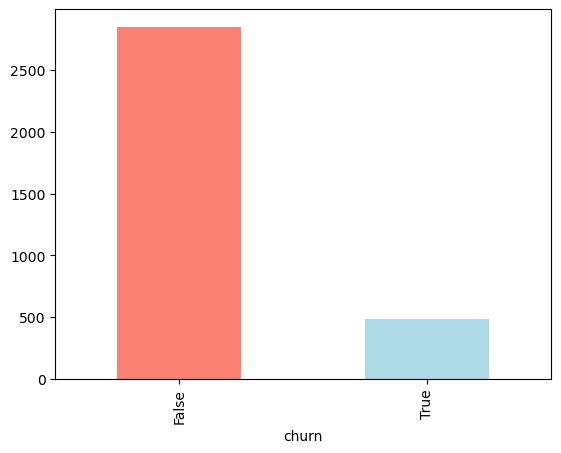

In [5]:
# Plot the results above on a bar graph 
df["churn"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Are there any missing values?
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Understanding feature distribution

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

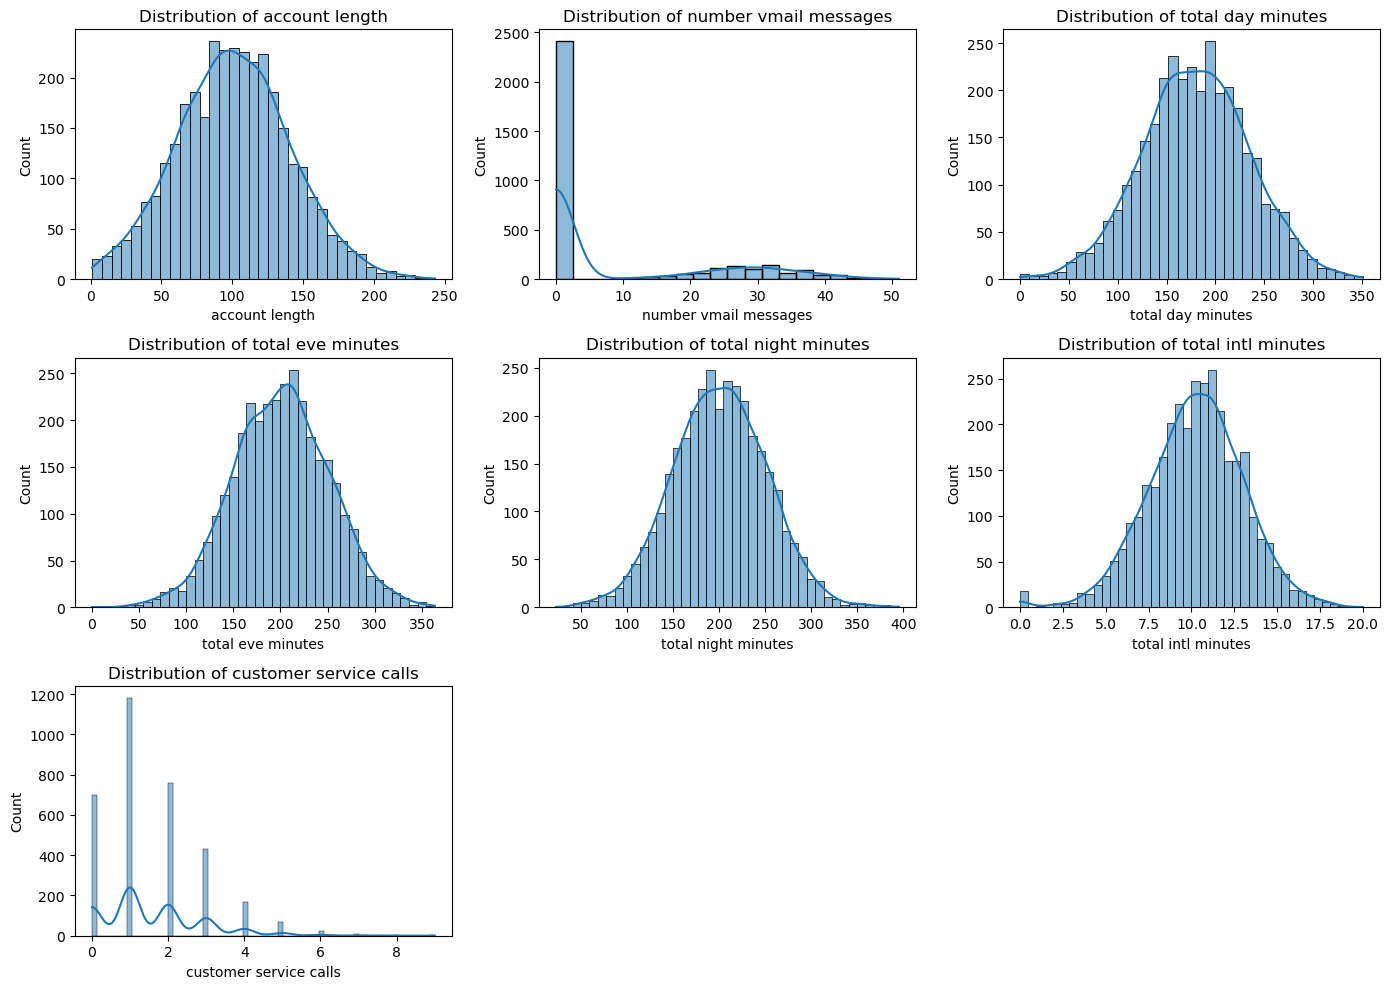

In [9]:

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 'total eve minutes', 
                      'total night minutes', 'total intl minutes', 'customer service calls']

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    
plt.tight_layout()
plt.show()

## Categorical Feature Analysis
Explore categorical features such as state, area code, international plan, and voice mail plan.

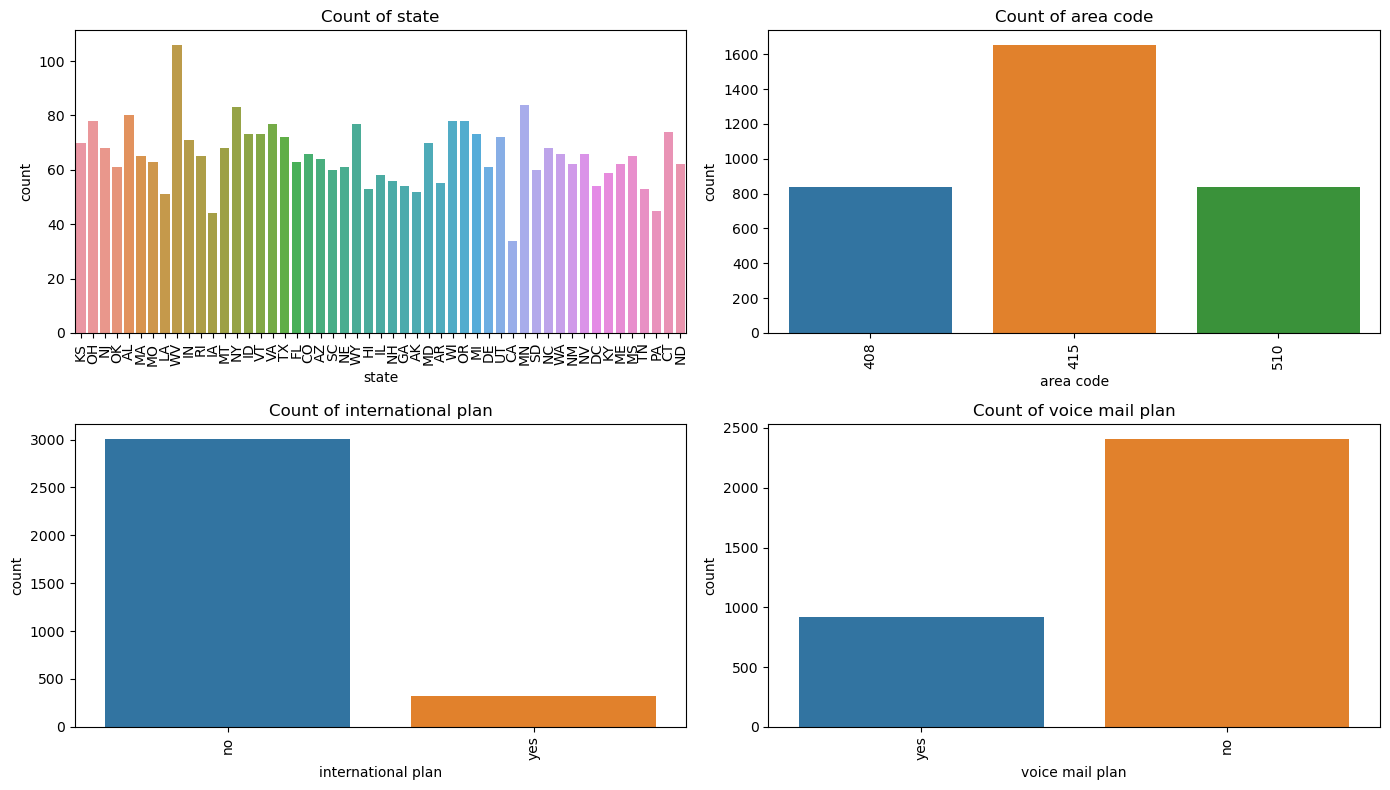

In [10]:
# Categorical features
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']

# Plot bar charts for categorical features
plt.figure(figsize=(14, 8))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


We will create a data frame called `mins_df` where we will merge all minutes talkes and use it to see if it influences customer churn.

In [11]:
# First, create a new column that sums up the minutes
df['total minutes'] = df['total day minutes'] + df['total intl minutes'] + df['total night minutes'] + df['total eve minutes']

# Then use pd.crosstab
mins_df = pd.crosstab(df['total minutes'], df['churn'])
mins_df

churn,False,True
total minutes,,
284.3,1,0
301.5,1,0
313.0,1,0
313.3,1,0
319.9,0,1
...,...,...
842.3,1,0
851.8,0,1
860.2,0,1


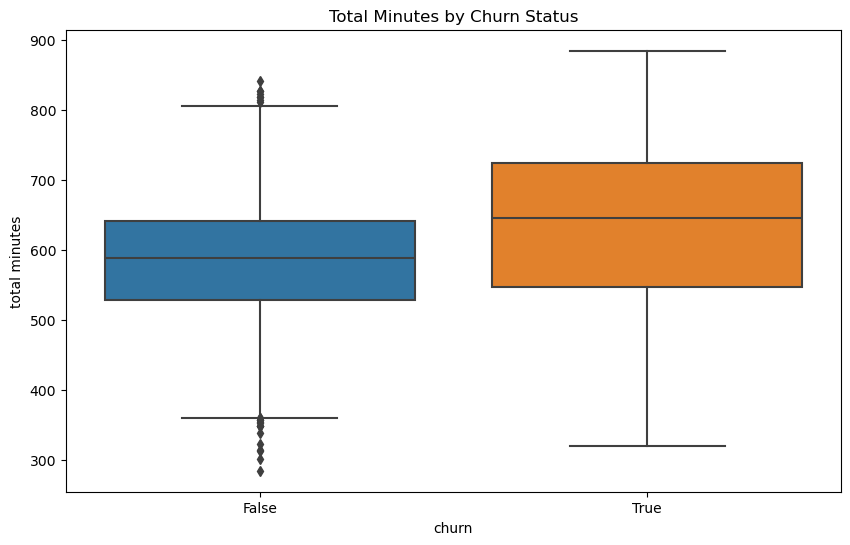

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='total minutes', data=df)
plt.title('Total Minutes by Churn Status')
plt.show()

## **5. Data Preparation**

*Here, we'll process and clean the data, handling any missing values, converting data types, and preparing the dataset for modeling.*

---

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [14]:
# One hot encode all categorical columns
df_encoded = pd.get_dummies(df, columns=['state', 'international plan', 'voice mail plan'])
df_encoded.head()

,account length,area code,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,382-4657,25,265.1,110,45.07,197.4,99,16.78,...,False,False,False,False,False,False,True,False,False,True
1,107,415,371-7191,26,161.6,123,27.47,195.5,103,16.62,...,False,False,False,False,False,False,True,False,False,True
2,137,415,358-1921,0,243.4,114,41.38,121.2,110,10.30,...,False,False,False,False,False,False,True,False,True,False
3,84,408,375-9999,0,299.4,71,50.90,61.9,88,5.26,...,False,False,False,False,False,False,False,True,True,False
4,75,415,330-6626,0,166.7,113,28.34,148.3,122,12.61,...,False,False,False,False,False,False,False,True,True,False


In [15]:
df_encoded.drop('phone number', axis=1, inplace=True)

In [16]:
# Dropping columns to find correlatioans
dropped_df = df.drop(['state', 'phone number', 'international plan', 'voice mail plan'], axis=1)
dropped_df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,717.2
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,625.2
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,539.4
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,564.8
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,512.0


In [17]:
dropped_df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541,-0.004785
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174,-0.006828
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728,0.014779
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151,0.611587
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459,0.005559
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151,0.611591
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796,0.560621
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233,0.002198
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786,0.560608
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493,0.557269


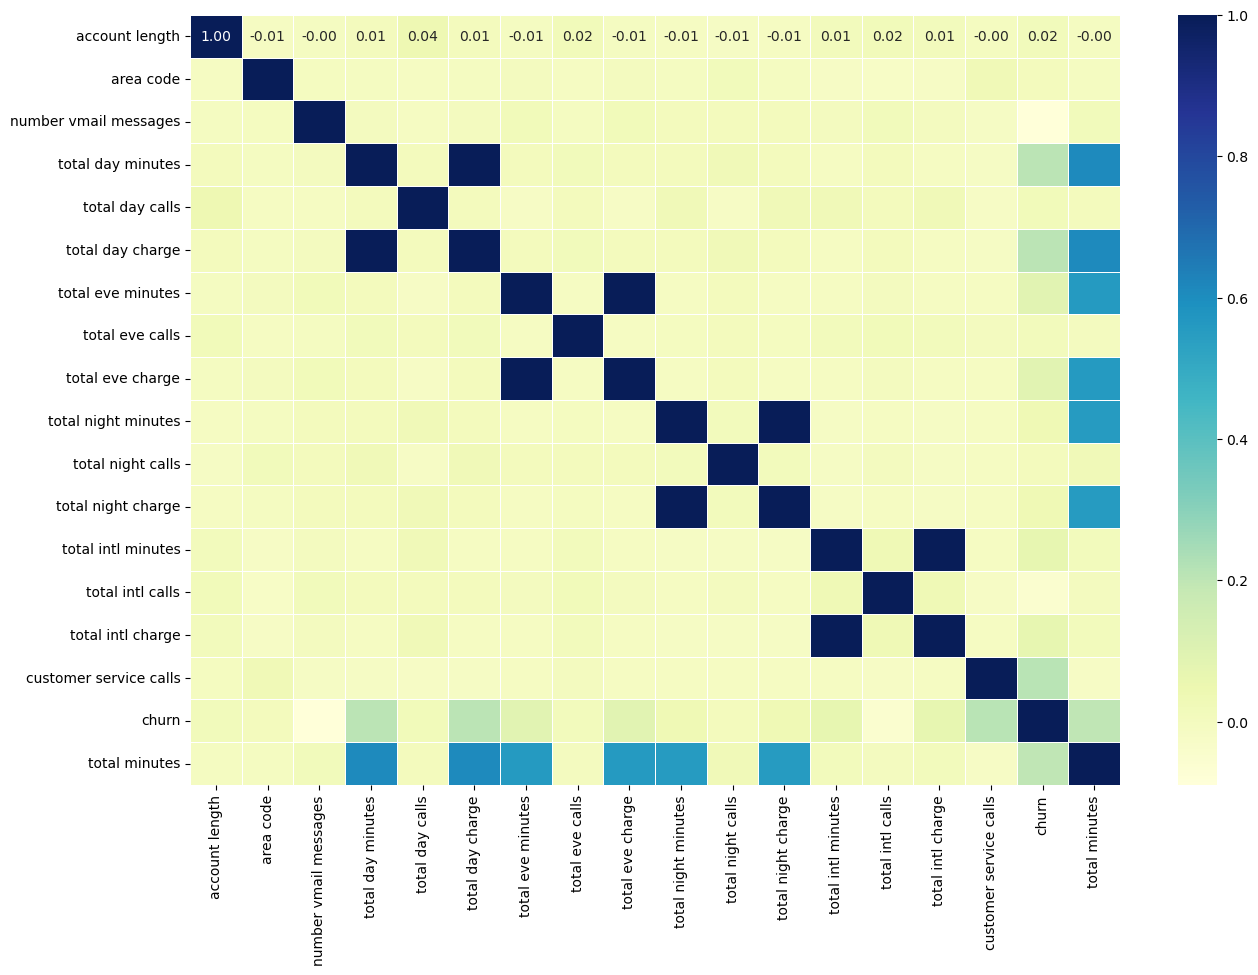

In [18]:
# Let's make our correlation matrix a little prettier
corr_matrix = dropped_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## **6. Modeling**

*In this section, we will build and evaluate multiple machine learning models to predict customer churn.*

---

In [19]:
# Splitting data into X and y
X = df_encoded.drop("churn", axis=1)

y = df_encoded["churn"]

In [20]:
X

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,True,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,True,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,True,False,True,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,True,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,...,False,False,False,False,False,False,True,False,False,True
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,...,False,False,False,False,True,False,True,False,True,False
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,...,False,False,False,False,False,False,True,False,True,False
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,...,False,False,False,False,False,False,False,True,True,False


In [21]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: churn, Length: 3333, dtype: bool

In [22]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [23]:
X_train

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,243,510,0,95.5,92,16.24,163.7,63,13.91,264.2,...,False,False,False,False,False,False,True,False,True,False
1373,108,415,0,112.0,105,19.04,193.7,110,16.46,208.9,...,False,False,False,False,False,False,True,False,True,False
679,75,415,0,222.4,78,37.81,327.0,111,27.80,208.0,...,False,False,False,False,False,False,False,True,True,False
56,141,415,0,126.9,98,21.57,180.0,62,15.30,140.8,...,False,False,False,False,False,False,True,False,True,False
1993,86,510,0,216.3,96,36.77,266.3,77,22.64,214.0,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,510,0,274.4,120,46.65,198.6,82,16.88,160.8,...,False,False,False,False,False,False,True,False,True,False
1130,122,415,0,35.1,62,5.97,180.8,89,15.37,251.6,...,False,False,False,False,False,False,True,False,True,False
1294,66,408,0,87.6,76,14.89,262.0,111,22.27,184.6,...,False,False,False,False,False,False,True,False,True,False
860,169,415,0,179.2,111,30.46,175.2,130,14.89,228.6,...,False,False,False,False,False,False,True,False,True,False


In [24]:
y_train

817     False
1373     True
679      True
56      False
1993    False
        ...  
1095    False
1130    False
1294    False
860     False
3174    False
Name: churn, Length: 2666, dtype: bool

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [25]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : trianing data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)

model_scores

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.856071964017991,
 'KNN': 0.8710644677661169,
 'Random Forest': 0.9475262368815592}

## Model Comparison 

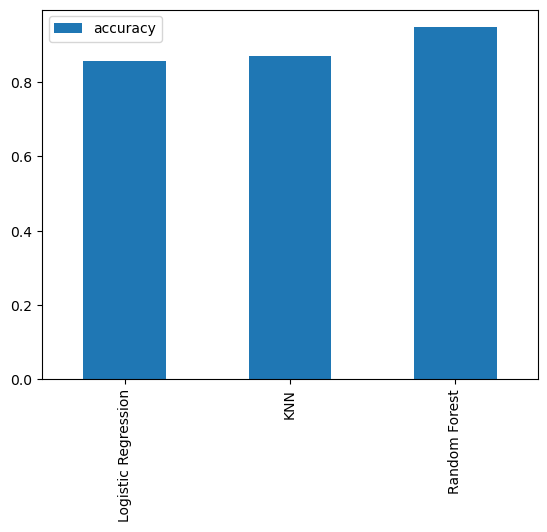

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first prediction aren't always what we should base our next steps off. What should we do?

Let's look at the following:

- Hyperparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Reacll
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

## **7. Evaluation**

*We'll assess the performance of our models and ensure they meet the business objectives outlined earlier.*

---

## Hyperparameter tuning
Here we are going to tune all the models and pick the best model.

In [28]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [29]:
train_scores

[1.0,
 0.905476369092273,
 0.9099774943735934,
 0.894973743435859,
 0.8972243060765192,
 0.8844711177794449,
 0.8927231807951987,
 0.8852213053263316,
 0.8900975243810952,
 0.8848462115528882,
 0.8870967741935484,
 0.8837209302325582,
 0.8859714928732183,
 0.8818454613653414,
 0.8844711177794449,
 0.8818454613653414,
 0.8833458364591148,
 0.881470367591898,
 0.8829707426856714,
 0.8792198049512379]

In [30]:
test_scores

[0.7871064467766117,
 0.863568215892054,
 0.8605697151424287,
 0.8695652173913043,
 0.8710644677661169,
 0.8800599700149925,
 0.8770614692653673,
 0.881559220389805,
 0.8860569715142429,
 0.889055472263868,
 0.8875562218890555,
 0.881559220389805,
 0.8860569715142429,
 0.8800599700149925,
 0.8845577211394303,
 0.8770614692653673,
 0.8800599700149925,
 0.8785607196401799,
 0.8785607196401799,
 0.8800599700149925]

Maximum KNN score on the test data: 88.91%


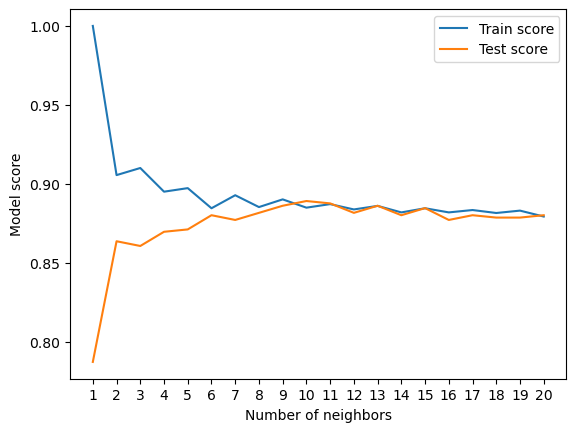

In [31]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV
We're going to tune:

1. LogisticRegression()
2. RandomForestClassifier()

... using RandomizedSearchCV

In [32]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20), 
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [33]:
# True LogisticRegression 

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']})

In [34]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [35]:
rs_log_reg.score(X_test, y_test)

0.8515742128935532

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...



In [36]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [37]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 4,
 'min_samples_leaf': 5,
 'max_depth': None}

In [38]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9400299850074962

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [39]:
# Different hyperparameters for our LogisticRegression model 
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [40]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

In [41]:
# Evaluate the grid search LogisticRegression model 
gs_log_reg.score(X_test, y_test)

0.856071964017991

In [42]:
model_scores

{'Logistic Regression': 0.856071964017991,
 'KNN': 0.8710644677661169,
 'Random Forest': 0.9475262368815592}

## Evaluating our tuned machine learning classifier, beyond accuracy
- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score
...and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [43]:
# Make predictions with tuned model 
y_preds = rs_rf.predict(X_test)

In [44]:
y_preds

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True,  True,

In [45]:
y_test

438     False
2674    False
1345     True
1957    False
2148    False
        ...  
2577    False
2763    False
3069    False
1468    False
582     False
Name: churn, Length: 667, dtype: bool

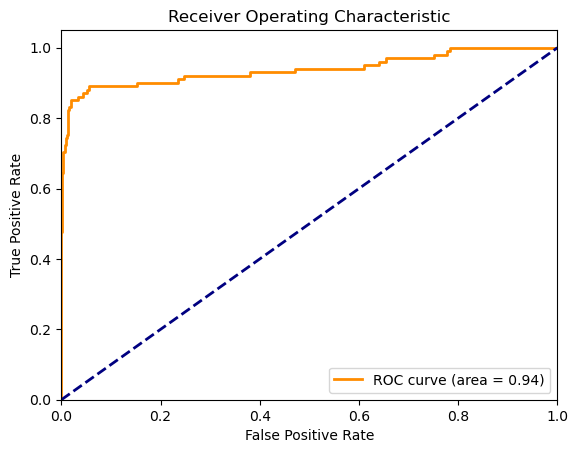

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
y_pred_prob = rs_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## **8. Conclusion**

*Summary of findings, challenges encountered, and future work.*
___

## **9. Recommendations**

*Recommendations based on the findings derived from the model to predict customer churn.*
___